In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from math import log
import seaborn as sns

plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('./usd_to_rub.csv', sep=',')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-09-02,28.937201,29.167999,28.909201,28.941601,28.941601,0.0
1,2011-09-05,29.142300,29.532499,29.126499,29.142300,29.142300,0.0
2,2011-09-06,29.458200,29.677000,29.382099,29.463900,29.463900,0.0
3,2011-09-07,29.579700,29.580099,29.430901,29.579700,29.579700,0.0
4,2011-09-08,29.399401,29.628000,29.389099,29.399401,29.399401,0.0


In [4]:
data = data.drop('Volume', axis = 1)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close
0,2011-09-02,28.937201,29.167999,28.909201,28.941601,28.941601
1,2011-09-05,29.142300,29.532499,29.126499,29.142300,29.142300
2,2011-09-06,29.458200,29.677000,29.382099,29.463900,29.463900
3,2011-09-07,29.579700,29.580099,29.430901,29.579700,29.579700
4,2011-09-08,29.399401,29.628000,29.389099,29.399401,29.399401


In [6]:
data.shape

(2871, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2871 non-null   object 
 1   Open       2867 non-null   float64
 2   High       2867 non-null   float64
 3   Low        2867 non-null   float64
 4   Close      2867 non-null   float64
 5   Adj Close  2867 non-null   float64
dtypes: float64(5), object(1)
memory usage: 134.7+ KB


In [8]:
data['Date'] = data['Date'].apply(lambda dt: pd.to_datetime(dt))
data.loc[:, 'year'] = data['Date'].apply(lambda dt: dt.year)
data['Date']

0      2011-09-02
1      2011-09-05
2      2011-09-06
3      2011-09-07
4      2011-09-08
          ...    
2866   2022-08-29
2867   2022-08-30
2868   2022-08-31
2869   2022-09-01
2870   2022-09-02
Name: Date, Length: 2871, dtype: datetime64[ns]

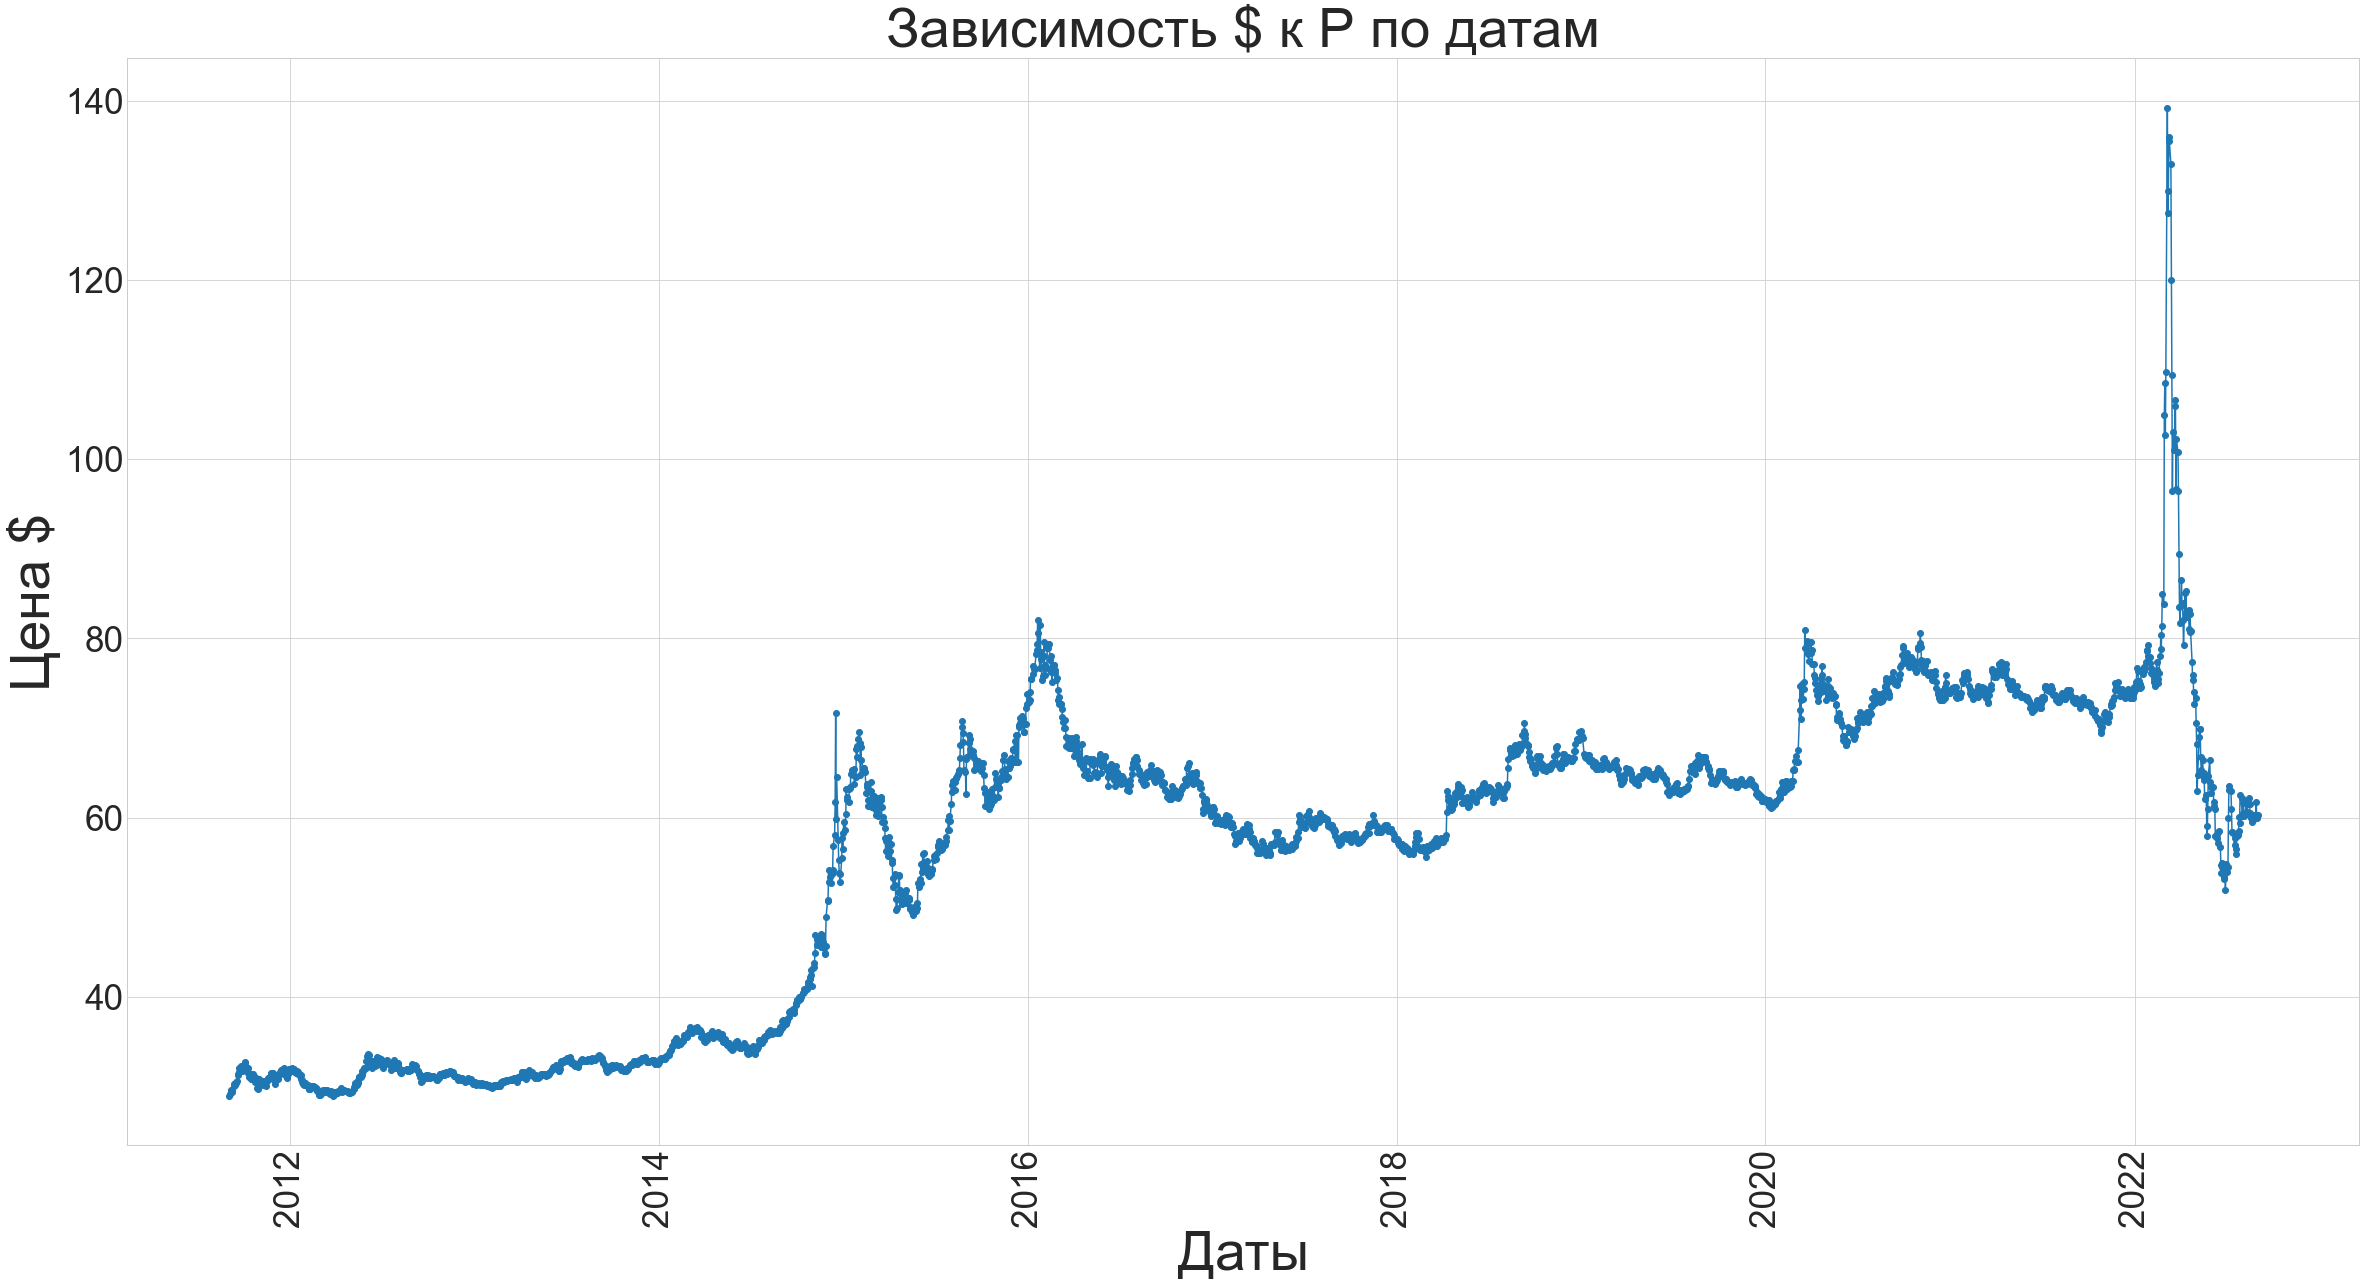

In [9]:
y = data['Open']
x = data['Date']
plt.figure(figsize=(40, 20))
plt.title('Зависимость $ к Р по датам', size = 55)
plt.ylabel('Цена $', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.plot(x, y, marker='o')

In [10]:
max_value = data['Open'].max()
min_value = data['Open'].min()

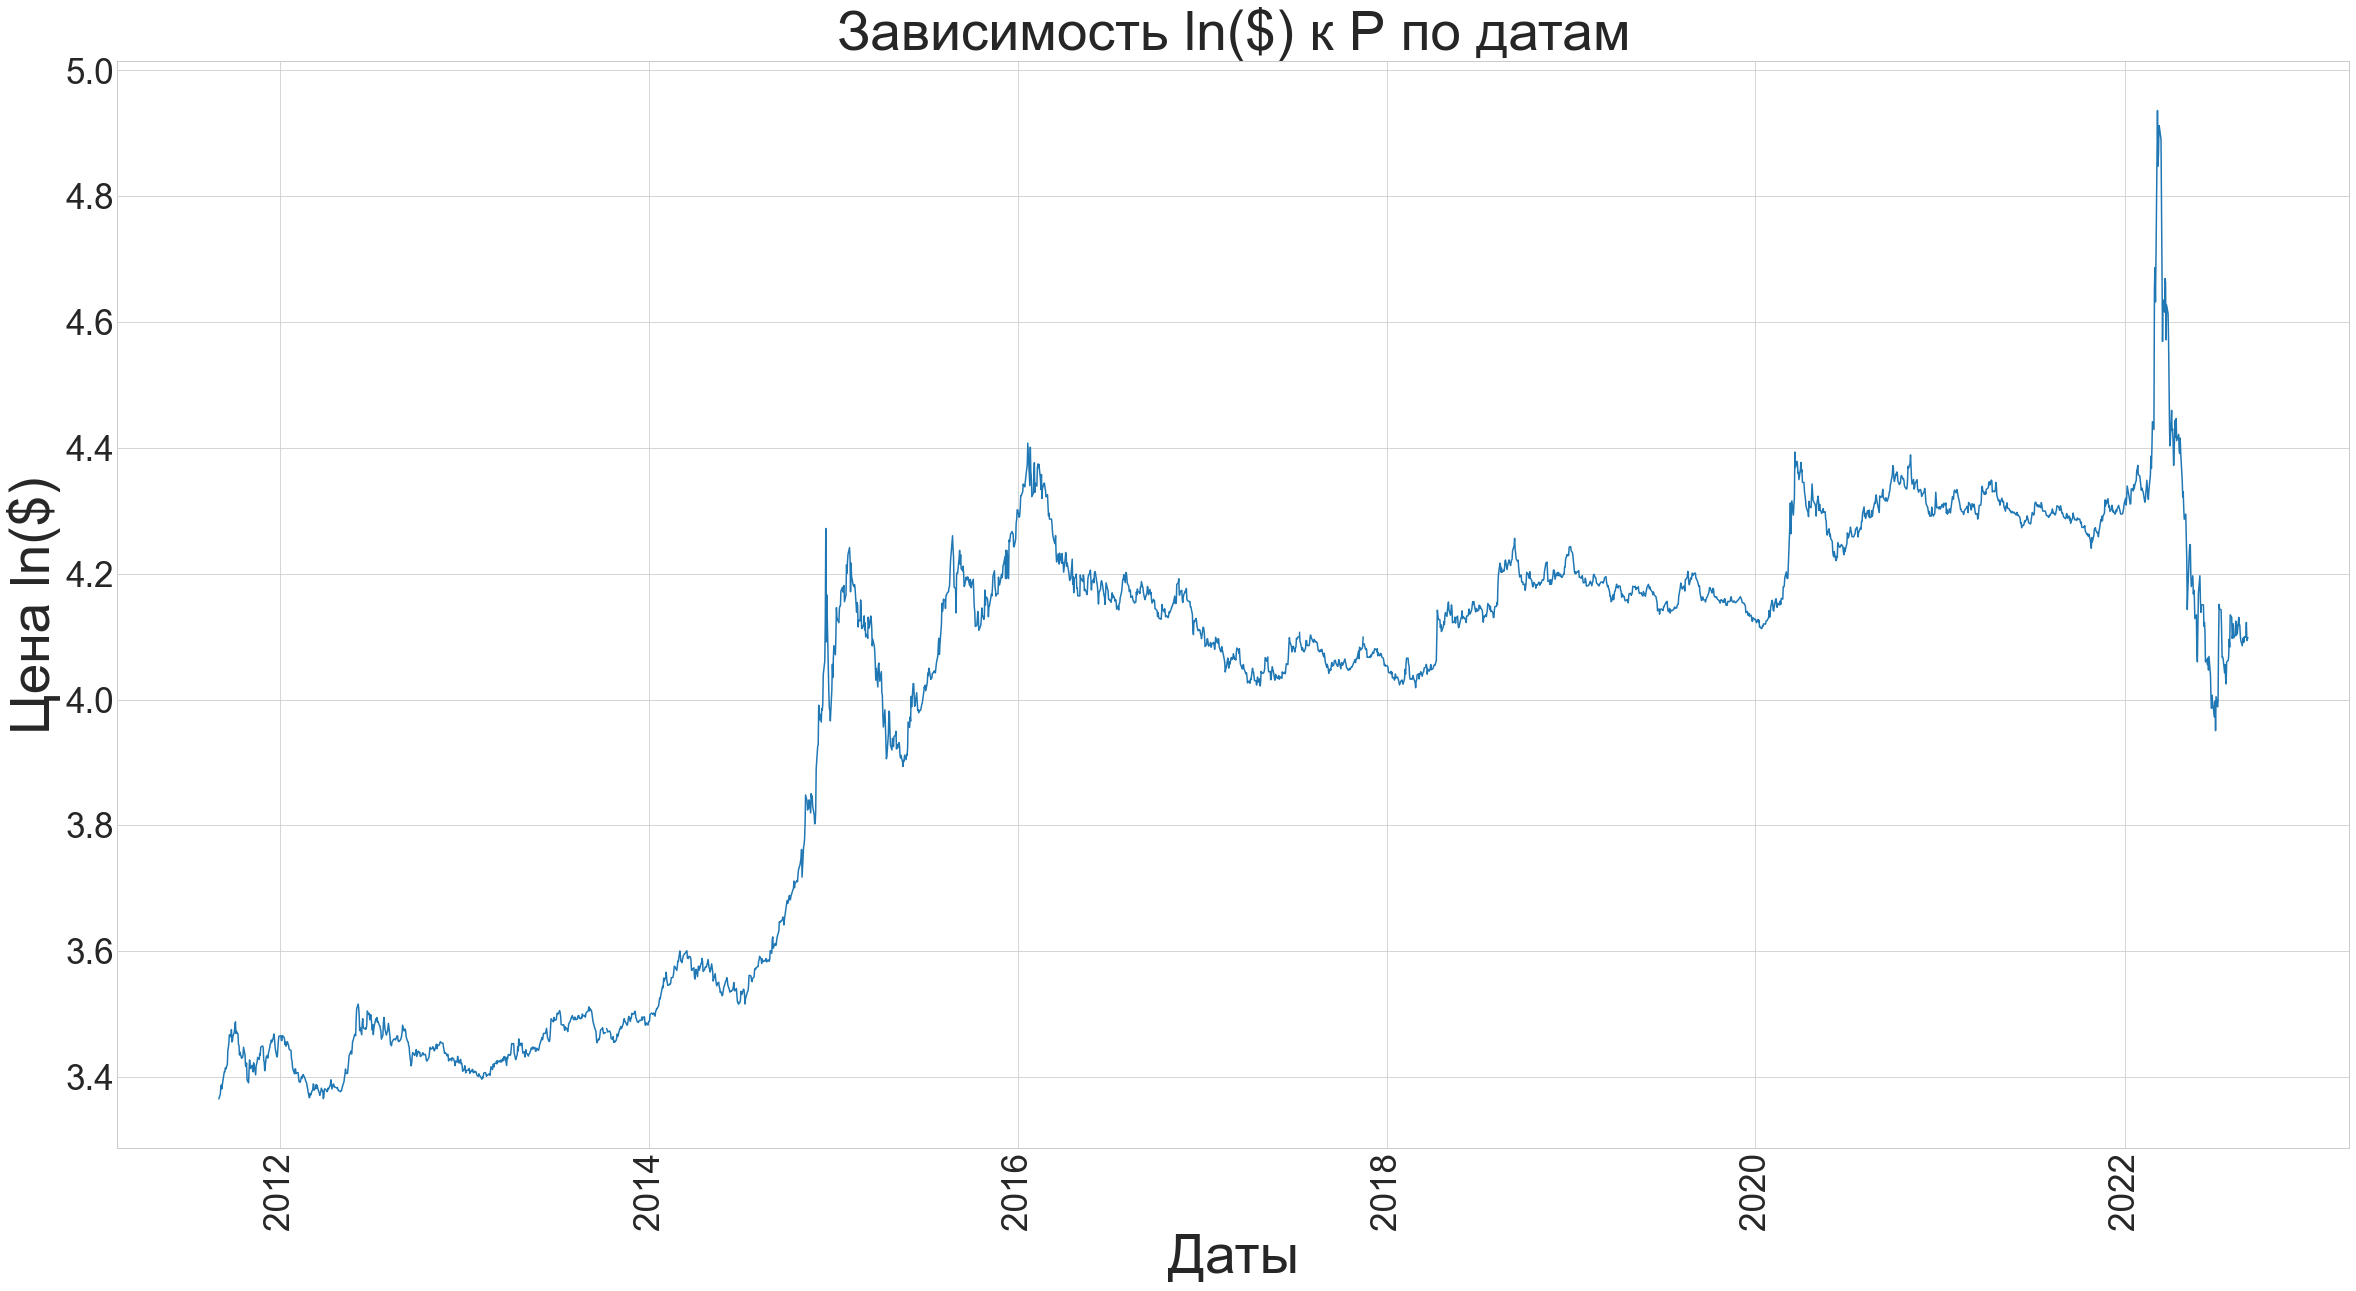

In [11]:
y = [log(x) for x in data['Open']]
x = data['Date']
plt.figure(figsize=(40, 20))
plt.title('Зависимость ln($) к Р по датам', size = 55)
plt.ylabel('Цена ln($)', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.plot(x, y)

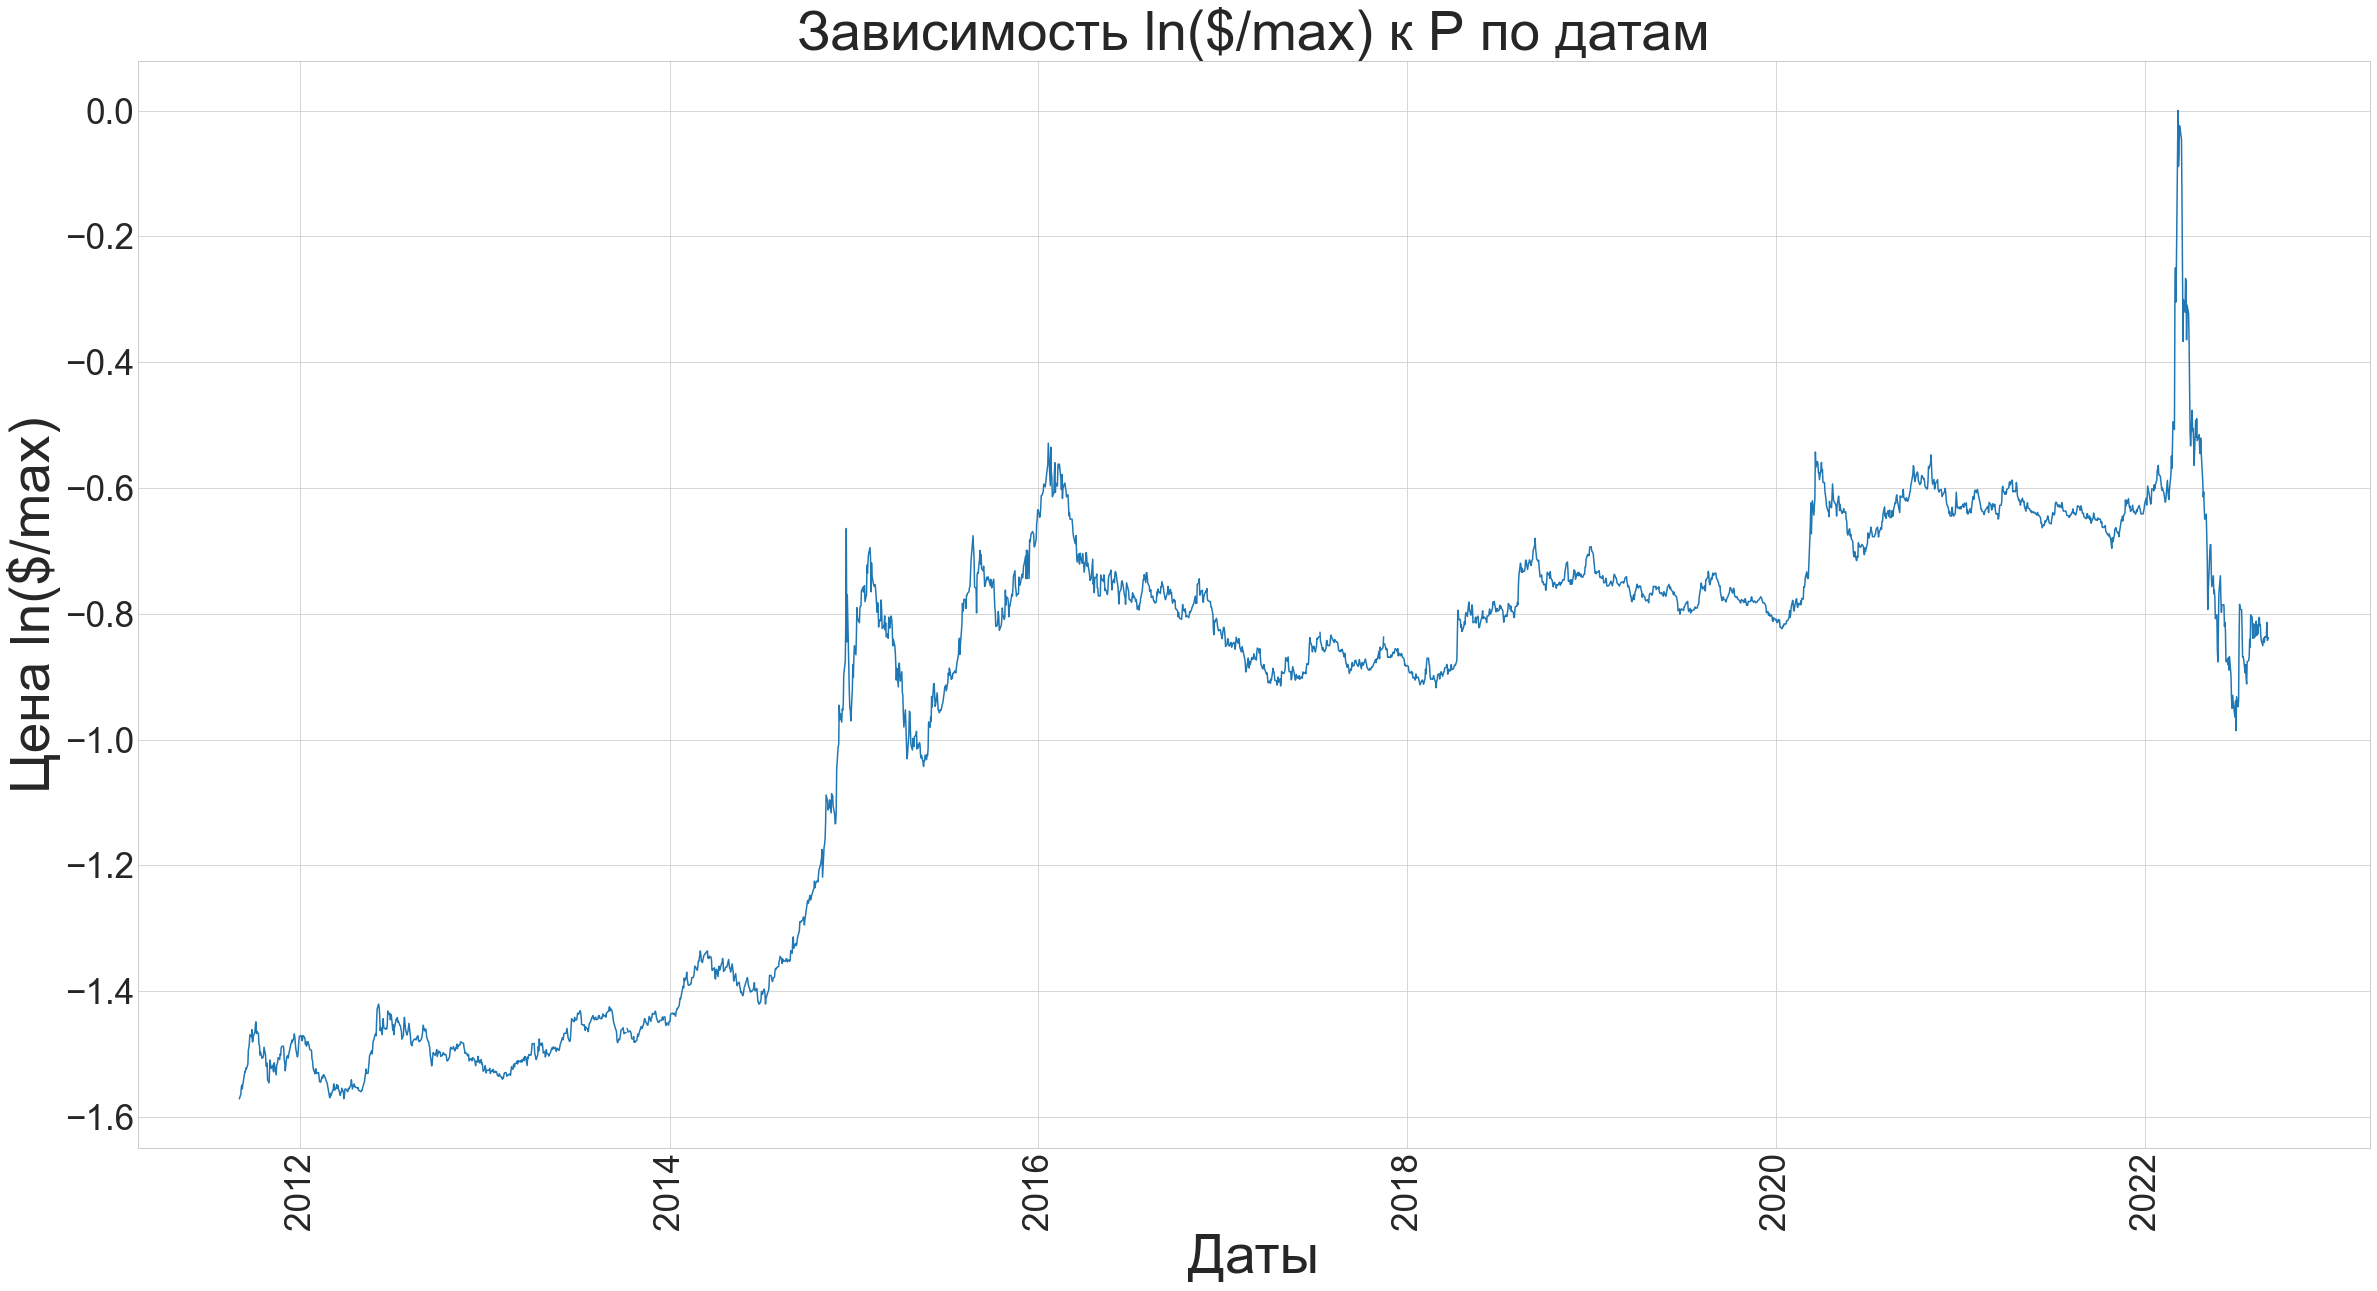

In [12]:
y = [log(x/max_value) for x in data['Open']]
x = data['Date']
plt.figure(figsize=(40, 20))
plt.title('Зависимость ln($/max) к Р по датам', size = 55)
plt.ylabel('Цена ln($/max)', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.plot(x, y)

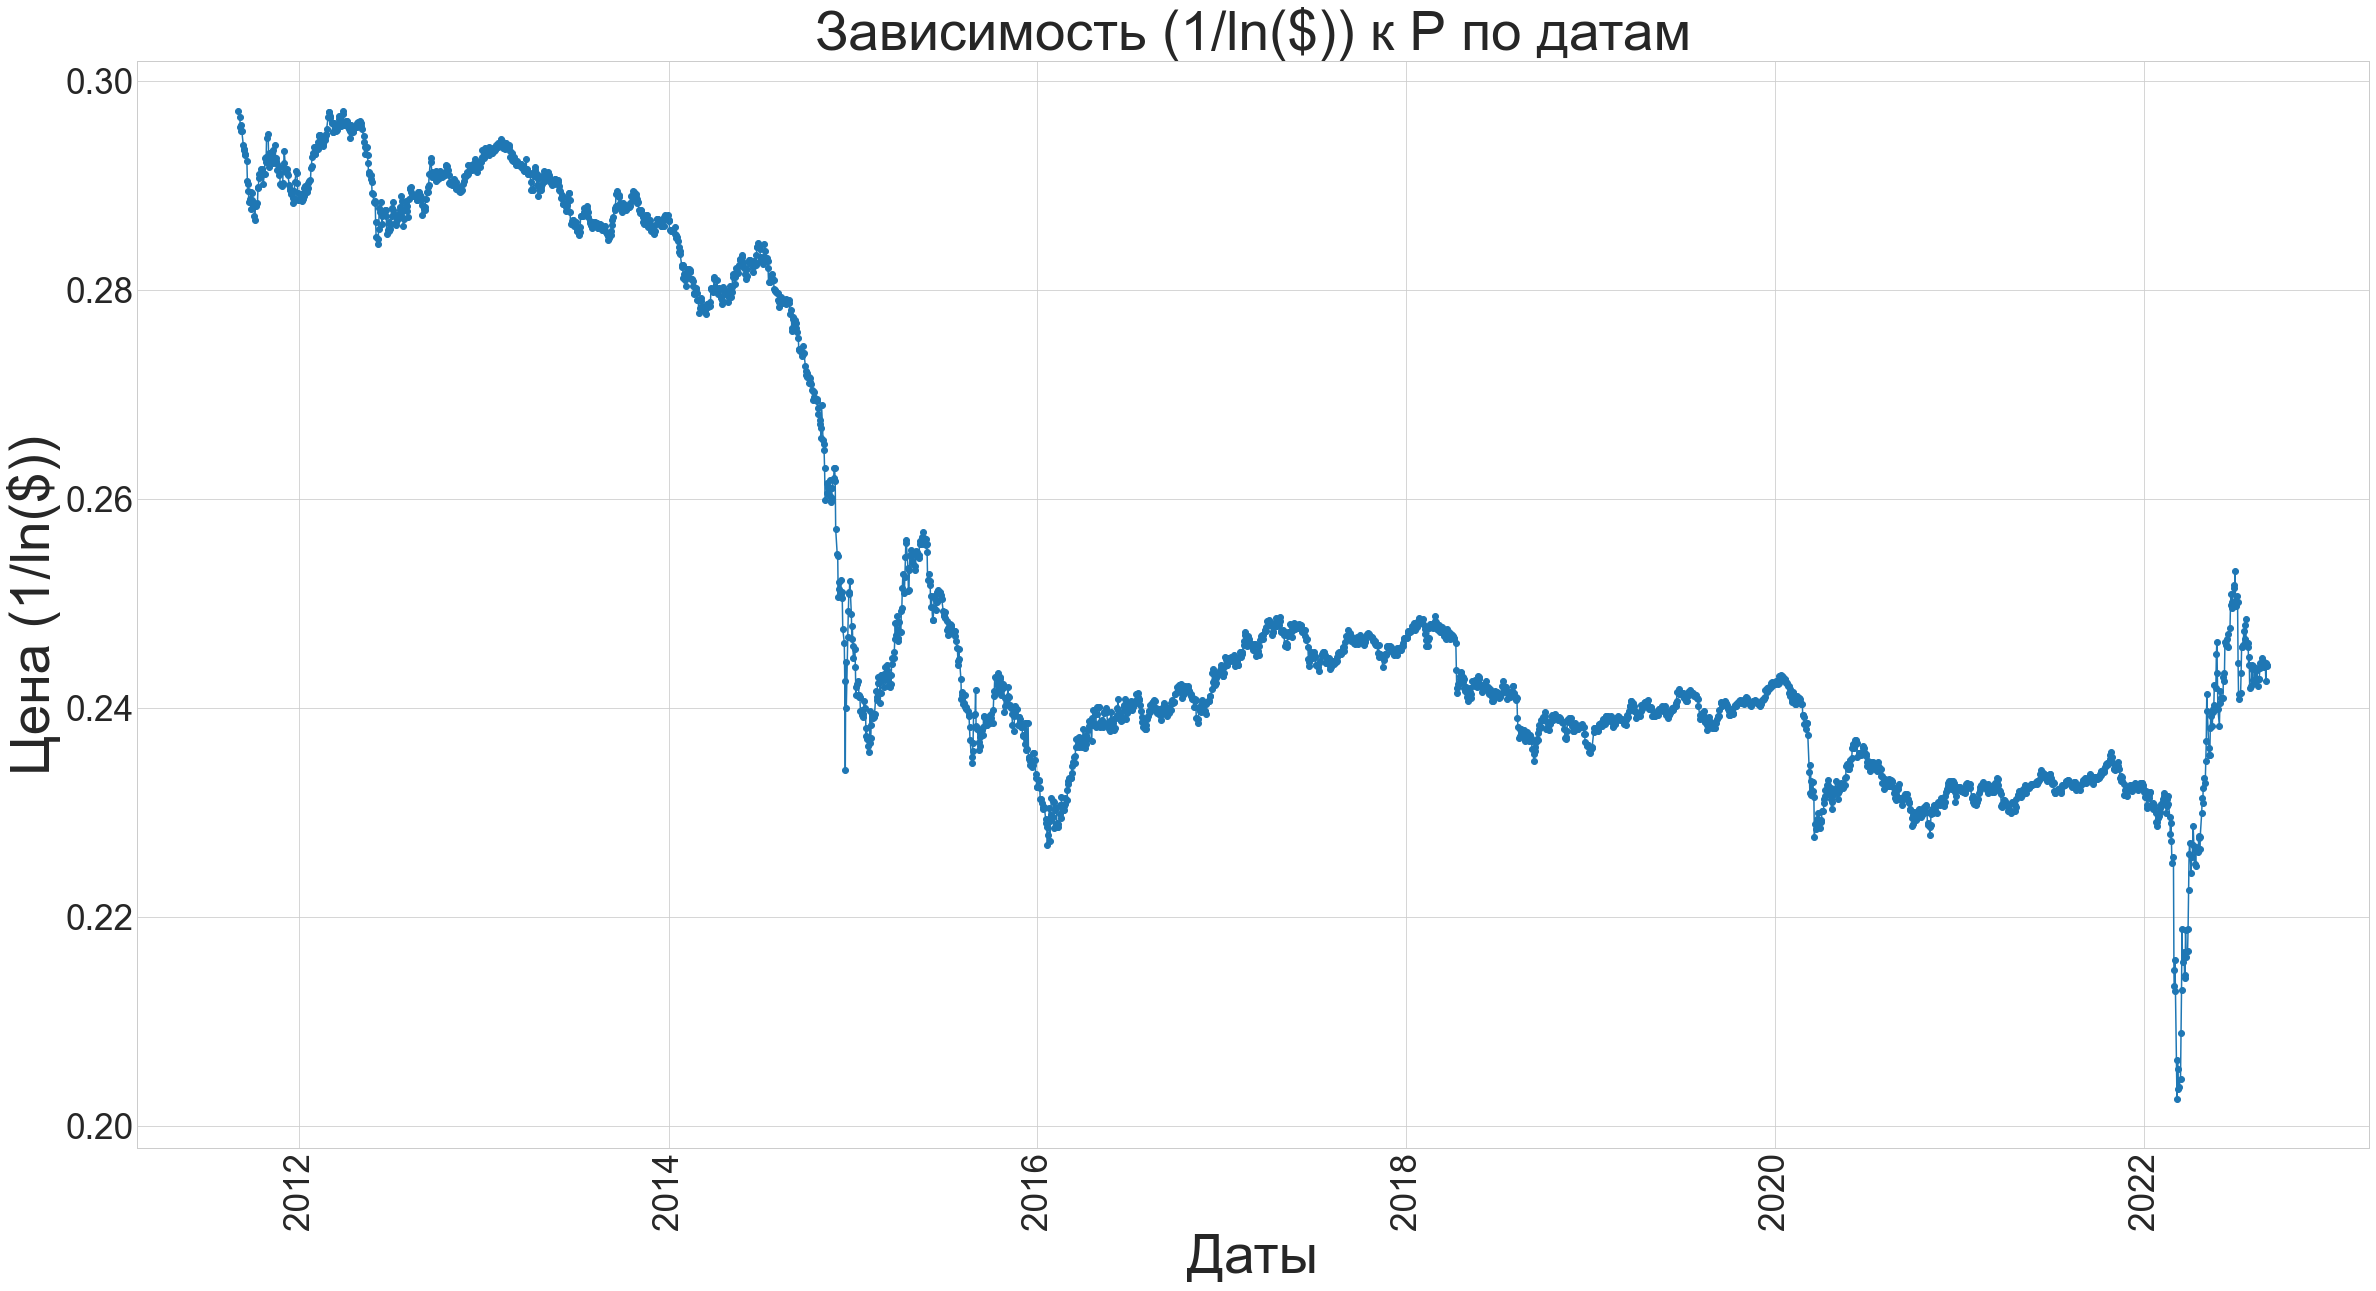

In [13]:
y = [(1/log(x)) for x in data['Open']]
x = data['Date']
plt.figure(figsize=(40, 20))
plt.title('Зависимость (1/ln($)) к Р по датам', size = 55)
plt.ylabel('Цена (1/ln($))', size = 55)
plt.xlabel('Даты', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.plot(x, y, marker = "o")


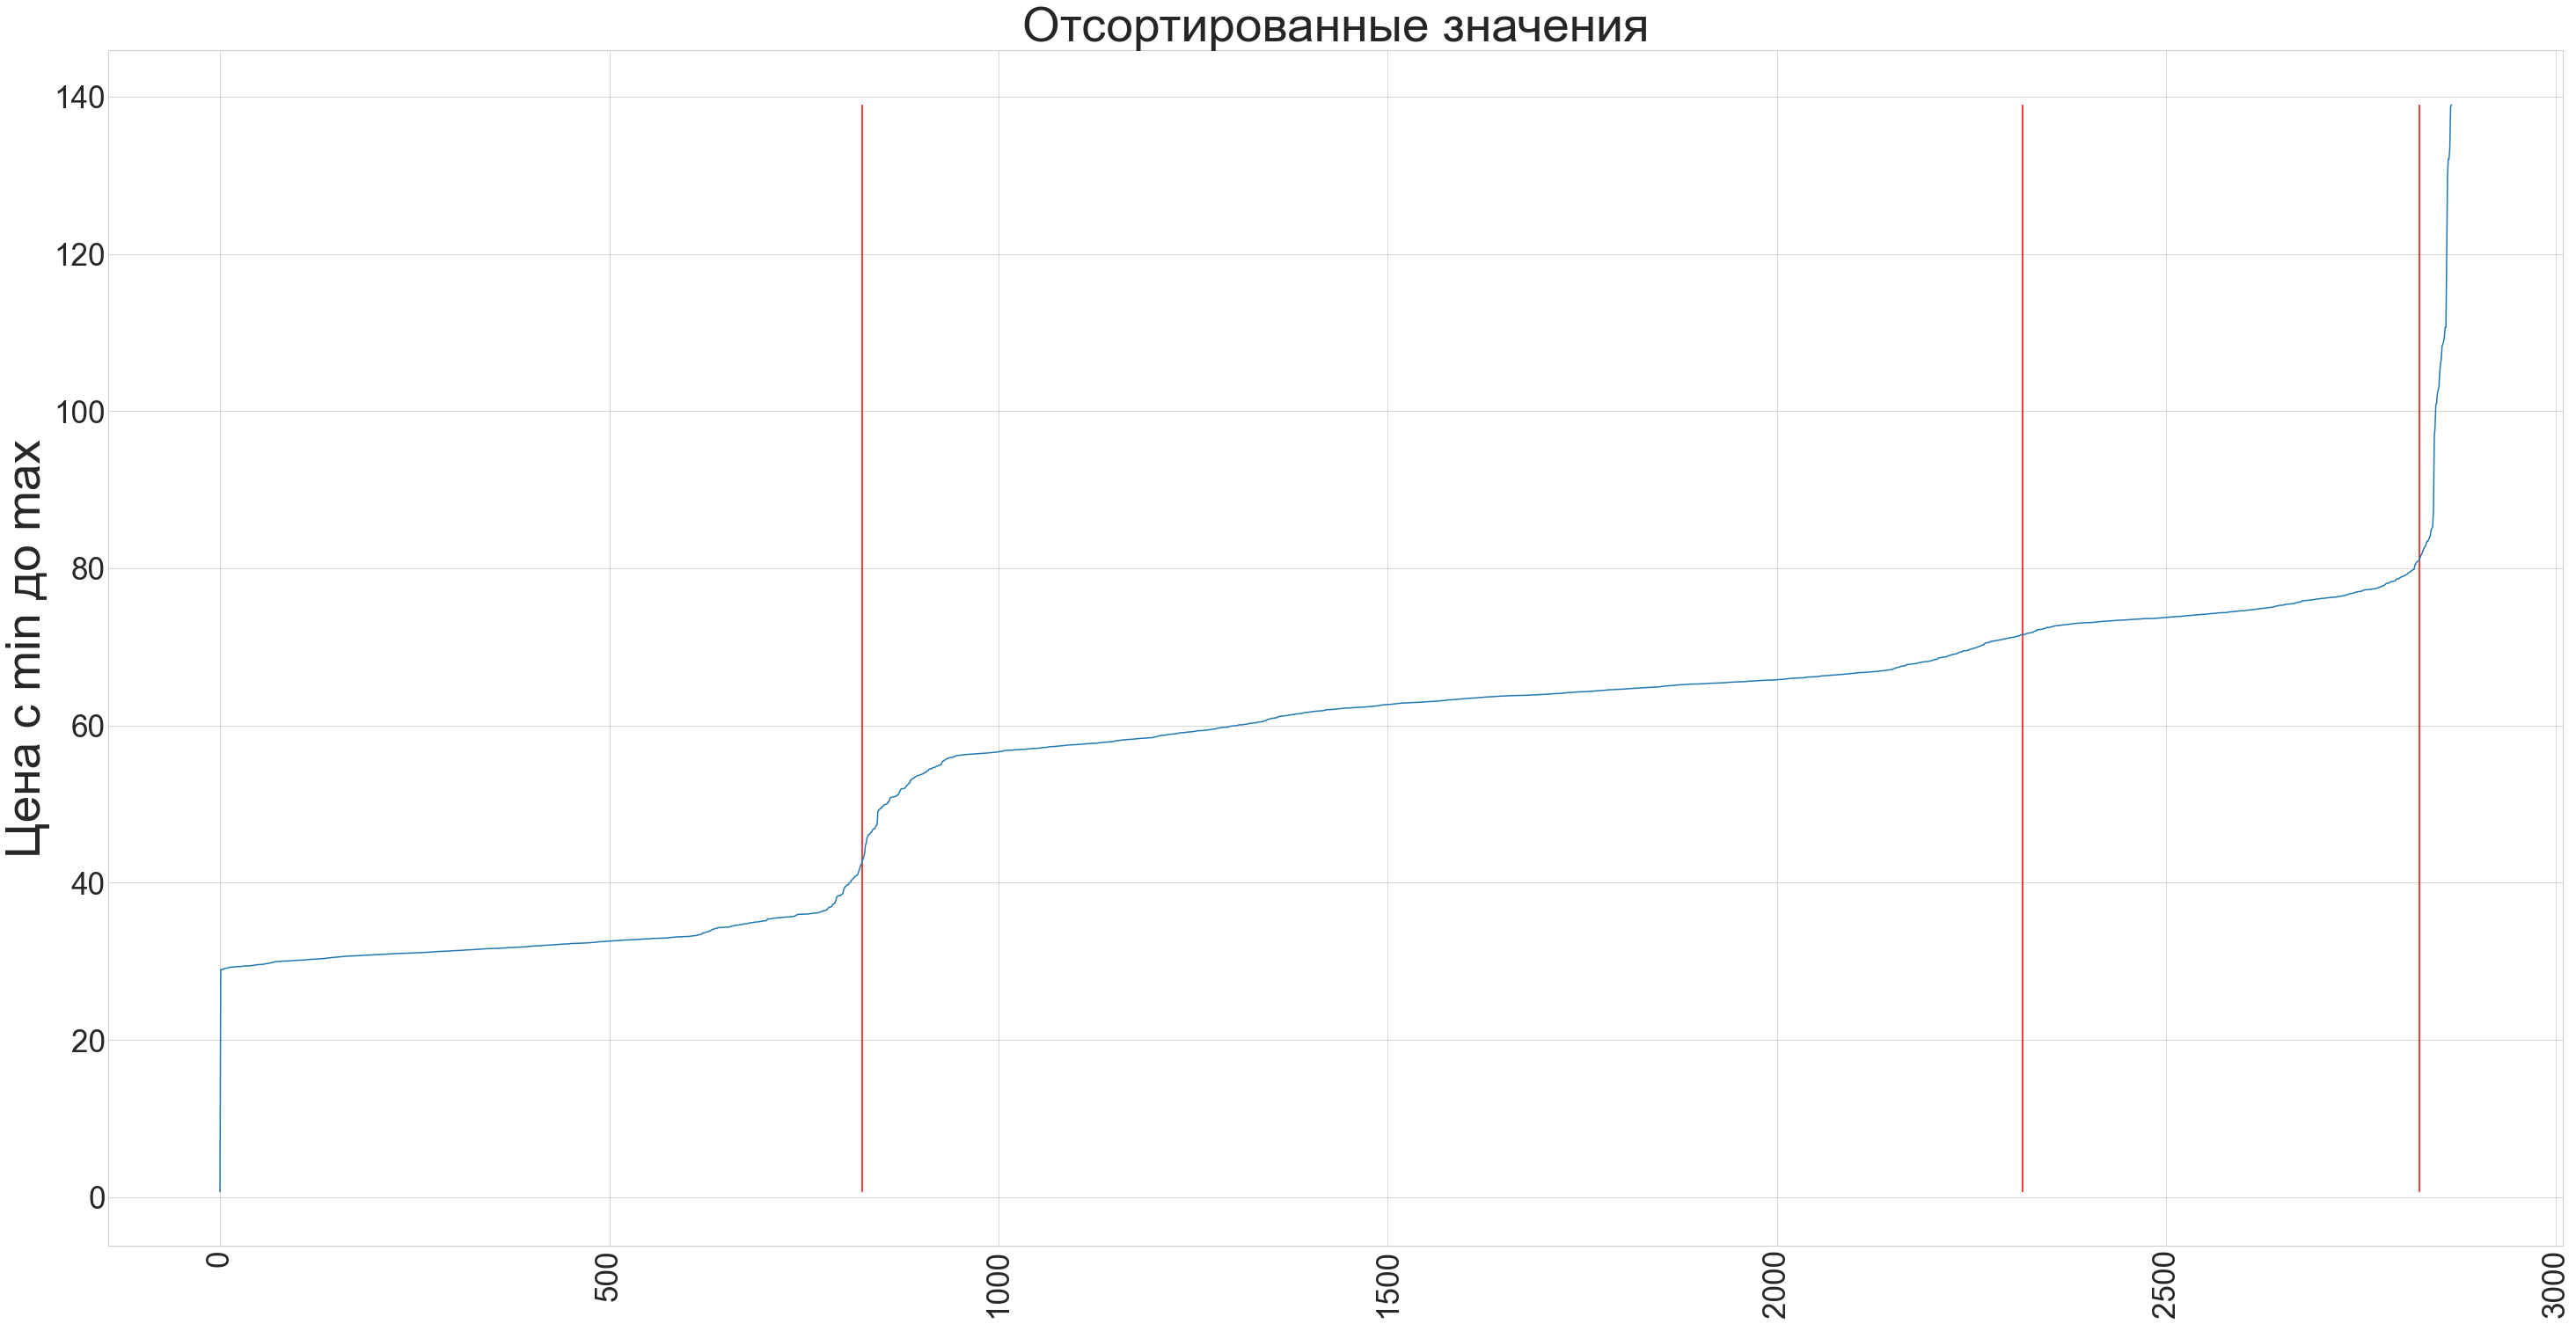

In [18]:
data.sort_values(by=['Close'], inplace=True)

x = [*range(len(data))]
y = data["Close"]
plt.figure(figsize=(50, 25))
plt.title('Отсортированные значения', size = 55)
plt.ylabel('Цена с min до max', size = 55)
plt.xticks(rotation=90)
plt.tick_params(labelsize=35)
plt.vlines(825, y.min(), y.max(), color = "r")
plt.vlines(2315, y.min(), y.max(), color = "r")
plt.vlines(2825, y.min(), y.max(), color = "r")
plt.minorticks_on()
plt.plot(x, y)

In [15]:
from collections import Counter

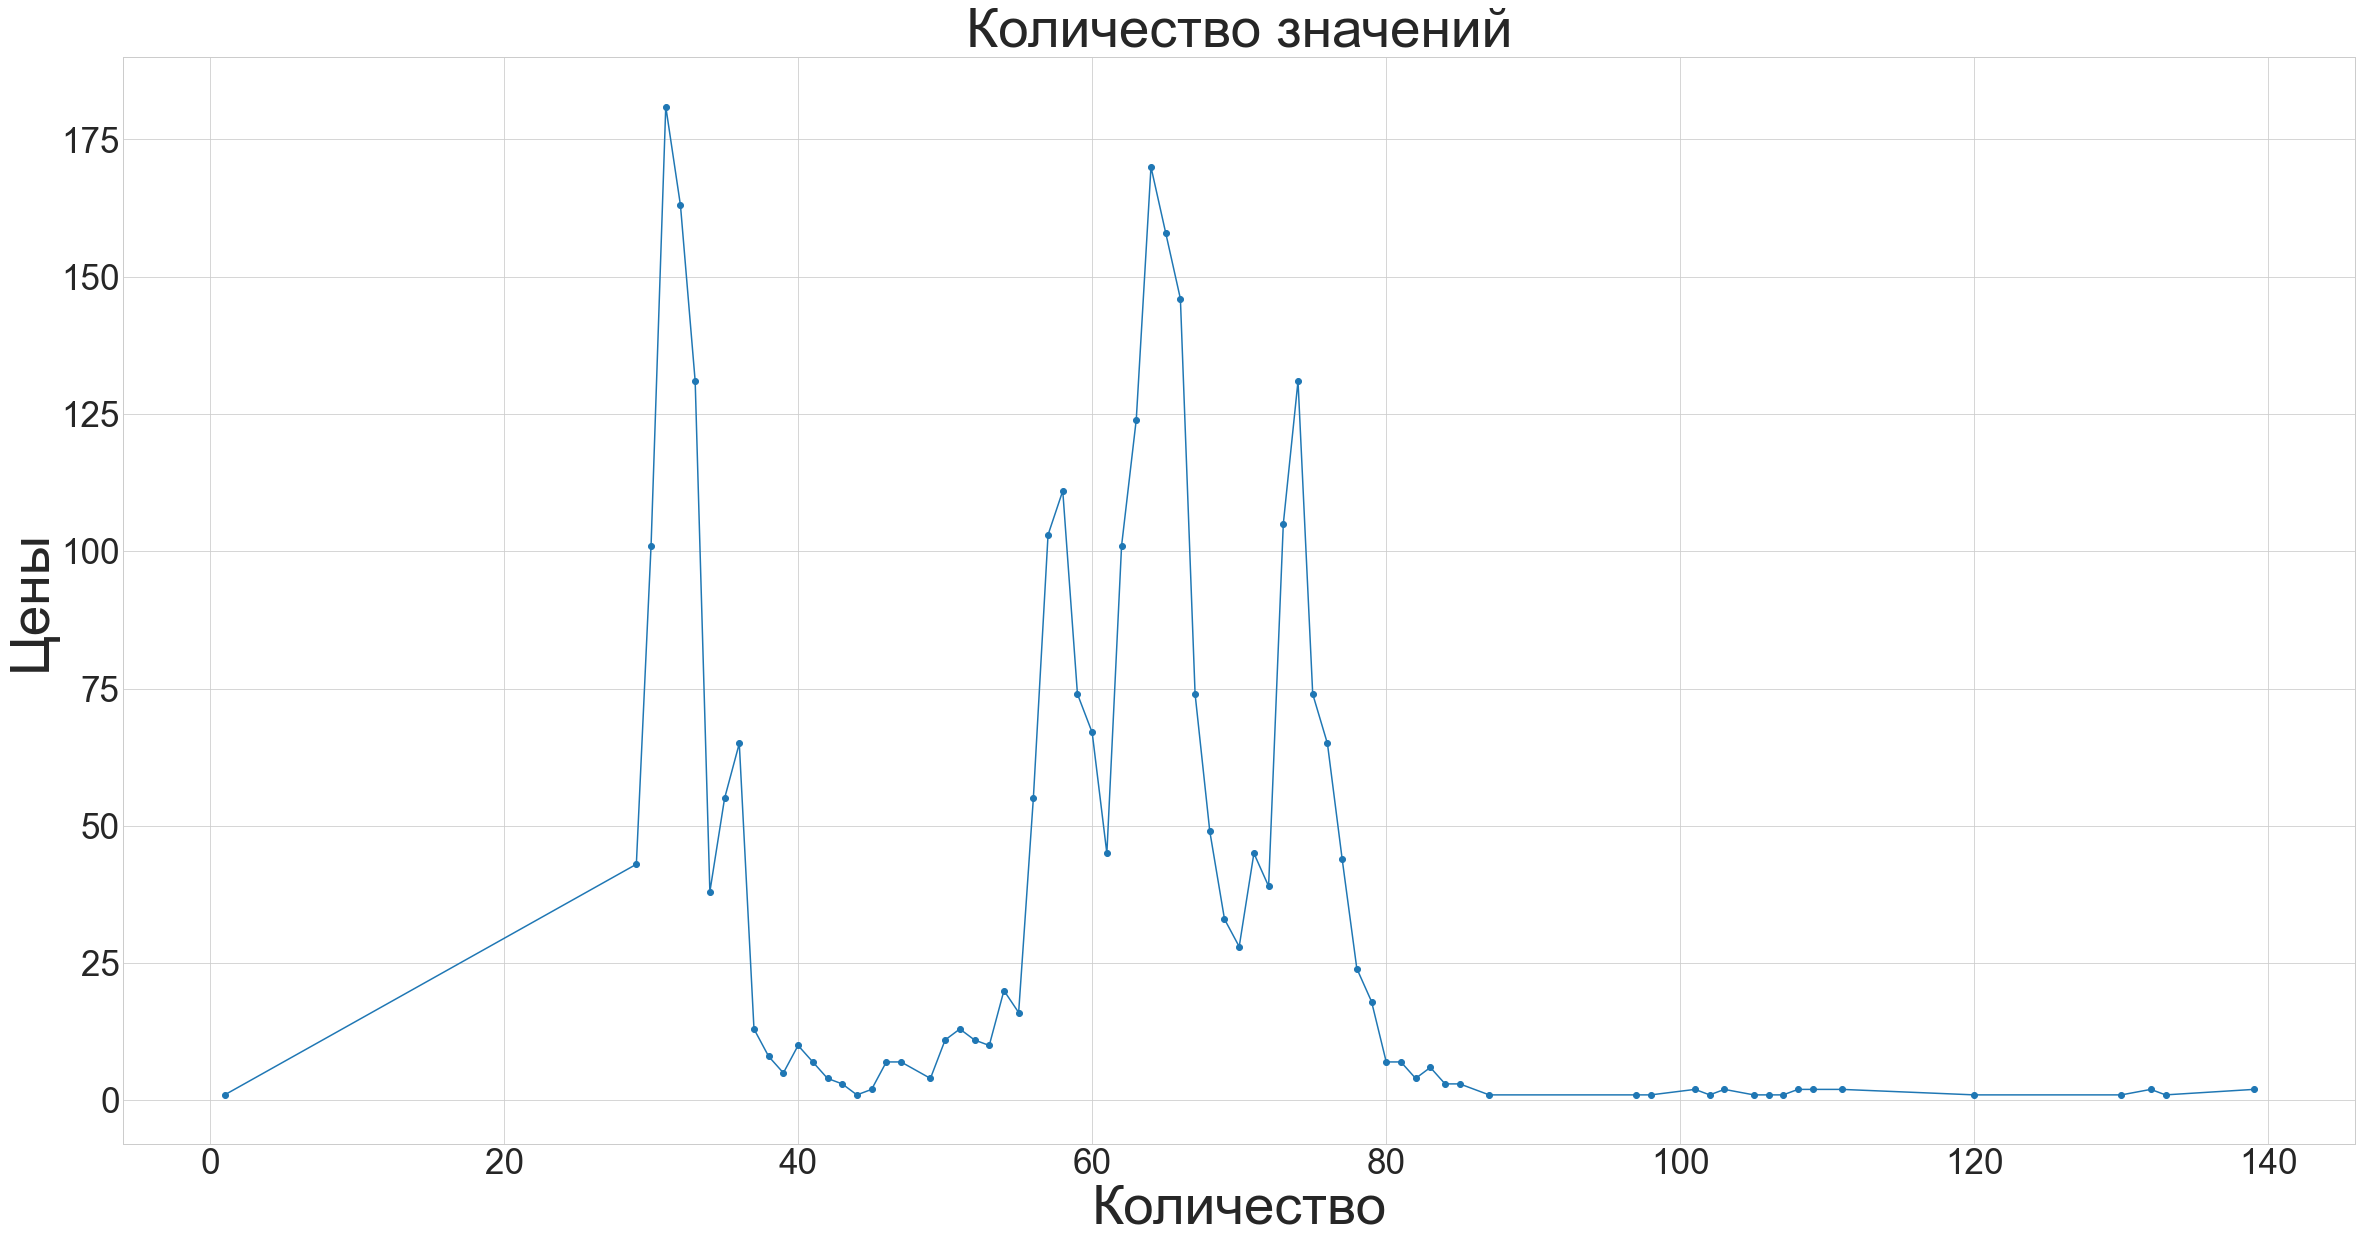

In [16]:
counts = Counter(np.around(data["Close"]))
x_1 = []
y_1 = []
for item, count in counts.items():
    x_1.append(count)
    y_1.append(item)
y = x_1
x = y_1
plt.figure(figsize=(40, 20))
plt.title('Количество значений', size = 55)
plt.ylabel('Цены', size = 55)
plt.xlabel('Количество', size = 55)
plt.tick_params(labelsize=35)
plt.plot(x, y, marker = "o")